In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap
import pickle

# Shap analysis - feature importance plus "clustering"

In [2]:
datafile = "Dataset_15_feat.xlsx"

df = pd.read_excel(datafile)

with open('Trained_models/15_feat_LGBM_model.pkl', 'rb') as file:  
    LGBM_model = pickle.load(file)

X = df.drop(['Experimental_index','DP_Group','Release'],axis='columns')
Y = df['Release']
G = df['DP_Group']

# LGBM Model 

### SHAP Summary plot (Figure 3B)

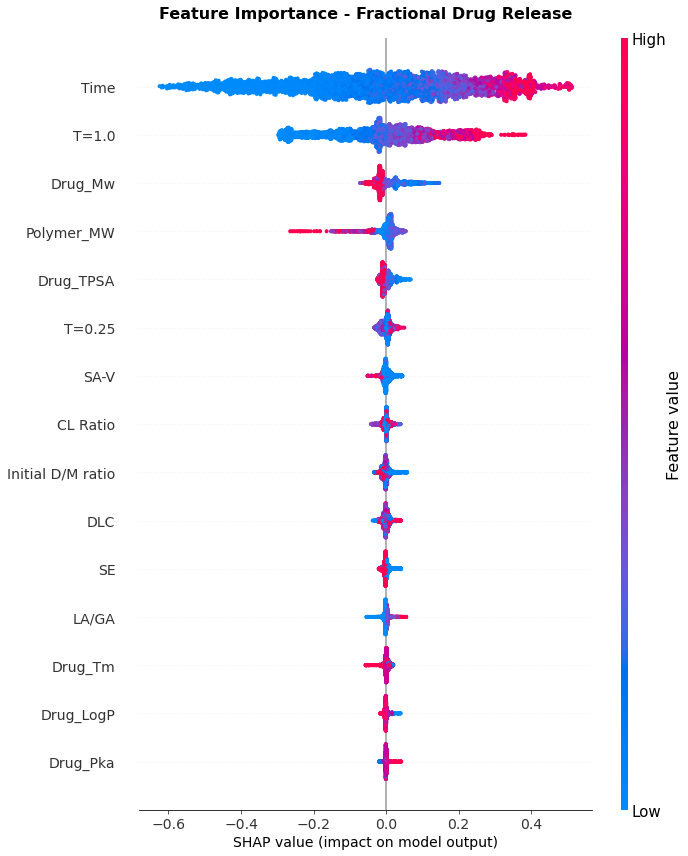

In [4]:
# after standard scalar
shap.initjs()


stdScale = StandardScaler().fit(X)
X_scale=stdScale.transform(X)

explainer = shap.TreeExplainer(LGBM_model)
shap_values = explainer.shap_values(X_scale)

shap.summary_plot(shap_values, X, feature_names=X.columns, show=False, plot_size=(10, 12))

# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()

# Modifying main plot parameters
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP value (impact on model output)", fontsize=14)
ax.set_title('Feature Importance - Fractional Drug Release', fontsize=16, weight = "bold", pad = 20)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=16)

plt.tight_layout()

plt.savefig('Figures/Figure_4/LGBM_SHAP_summary_plot_2.png', dpi=600, format = 'png', transparent=False)

### SHAP decision and force plots (Figure 4(B & C))

In [9]:
X.head()

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_LogP,Time,T=0.25,T=1.0
0,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,-0.7977,0.000000,0.091248,0.350932
1,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,-0.7977,0.260639,0.091248,0.350932
2,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,-0.7977,1.059830,0.091248,0.350932
3,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,-0.7977,2.089820,0.091248,0.350932
4,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,-0.7977,3.113530,0.091248,0.350932


In [10]:
# select example - Experimental_index84

EXP84 = df.loc[df['Experimental_index'] == 84]
EXP84.tail()

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_LogP,Time,T=0.25,T=1.0,Release
97,84,5-FU-PLGA,1.0,104000,0.0,282.5,8.02,0.8,0.176,210.526316,0.0,130.078,65.72,-0.7977,17.2634,0.068377,0.217283,0.874042
98,84,5-FU-PLGA,1.0,104000,0.0,282.5,8.02,0.8,0.176,210.526316,0.0,130.078,65.72,-0.7977,18.1489,0.068377,0.217283,0.895139
99,84,5-FU-PLGA,1.0,104000,0.0,282.5,8.02,0.8,0.176,210.526316,0.0,130.078,65.72,-0.7977,19.2279,0.068377,0.217283,0.949507
100,84,5-FU-PLGA,1.0,104000,0.0,282.5,8.02,0.8,0.176,210.526316,0.0,130.078,65.72,-0.7977,20.1780,0.068377,0.217283,0.983078
101,84,5-FU-PLGA,1.0,104000,0.0,282.5,8.02,0.8,0.176,210.526316,0.0,130.078,65.72,-0.7977,21.1267,0.068377,0.217283,1.004200


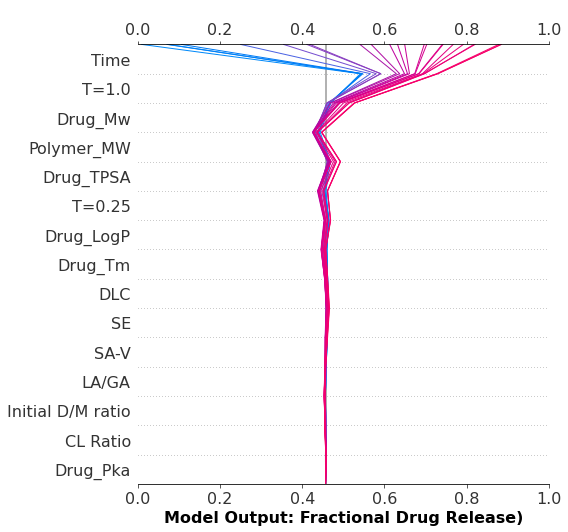

In [43]:
# default base value - Cumulative SHAP Decision Plots for LGBM model (n = 200)
#shap.initjs()

# after standard scalar
shap.initjs()

shap.decision_plot(explainer.expected_value, shap_values[77:101,:], 
                   feature_names=X.columns.tolist(), title=" " , 
                   xlim = [0,1], color_bar=False, show=False)

# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()

# Modifying main plot parameters
ax.tick_params(labelsize=16)
ax.set_xlabel("Model Output: Fractional Drug Release)", fontsize=16, weight = "bold", color='black')
#ax.set_title('Cumulative SHAP Decision Plot: 5-FU-PLGA', fontsize=16, weight = "bold", pad = 20, color='black')

plt.tight_layout()

plt.savefig('Figures/Figure_5/LGBM_Decision_plot_INEDX84_SLIDES.png', dpi=600, format = 'png', transparent=False)

In [13]:
# first release point for EXP_84
EXP84.loc[[77]]

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_LogP,Time,T=0.25,T=1.0,Release
77,84,5-FU-PLGA,1.0,104000,0.0,282.5,8.02,0.8,0.176,210.526316,0.0,130.078,65.72,-0.7977,0.0,0.068377,0.217283,0.0


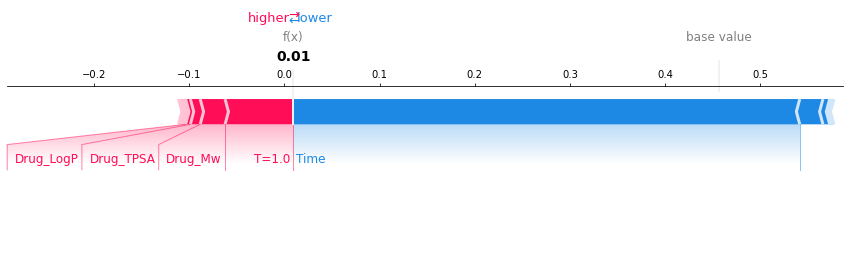

In [58]:
shap.initjs()

shap.plots.force(explainer.expected_value, shap_values[77,:], feature_names=X.columns.tolist(), 
                 link='identity', plot_cmap='RdBu', matplotlib=True, show=False, figsize=(12, 4), 
                 ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, 
                 contribution_threshold=0.05)

plt.tight_layout()

plt.savefig('Figures/Figure_5/LGBM_ForcePlot_1', dpi=600, format = 'png', transparent=False)

In [15]:
# tenth release point for EXP_84

EXP84.loc[[87]]

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_LogP,Time,T=0.25,T=1.0,Release
87,84,5-FU-PLGA,1.0,104000,0.0,282.5,8.02,0.8,0.176,210.526316,0.0,130.078,65.72,-0.7977,7.13145,0.068377,0.217283,0.542237


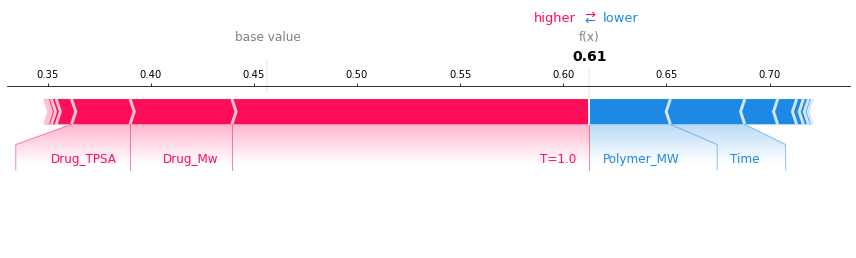

In [61]:
shap.initjs()

shap.plots.force(explainer.expected_value, shap_values[87,:], feature_names=X.columns.tolist(), 
                 link='identity', plot_cmap='RdBu', matplotlib=True, show=False, figsize=(12, 4), 
                 ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, 
                 contribution_threshold=0.05)

plt.tight_layout()

plt.savefig('Figures/Figure_5/LGBM_ForcePlot_2', dpi=600, format = 'png', transparent=False)

In [17]:
# twentith release point for EXP_84

EXP84.loc[[97]]

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_LogP,Time,T=0.25,T=1.0,Release
97,84,5-FU-PLGA,1.0,104000,0.0,282.5,8.02,0.8,0.176,210.526316,0.0,130.078,65.72,-0.7977,17.2634,0.068377,0.217283,0.874042


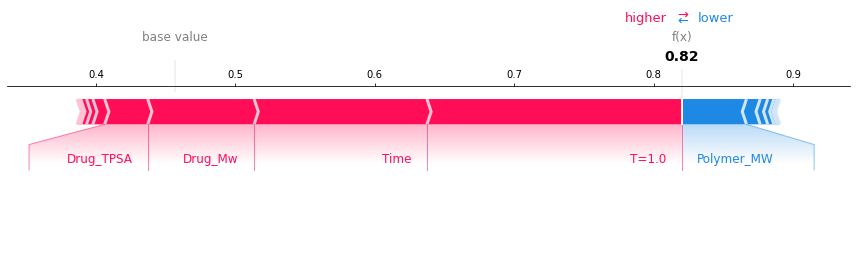

In [60]:
shap.initjs()

shap.plots.force(explainer.expected_value, shap_values[97,:], feature_names=X.columns.tolist(), 
                 link='identity', plot_cmap='RdBu', matplotlib=True, show=False, figsize=(12, 4), 
                 ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, 
                 contribution_threshold=0.05)

plt.tight_layout()

plt.savefig('Figures/Figure_5/LGBM_ForcePlot_3', dpi=600, format = 'png', transparent=False)